In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('BestSeller Books of Amazon.csv')

In [4]:
df.shape

(400, 4)

In [28]:
df.columns

Index(['Book Name', 'Author Name', 'Rating', 'Price'], dtype='object')

In [6]:
df.head(10)

,Book Name,Author Name,Rating,Price
0,Maths Concept King All Formulas and Theorum | ...,Gagan Pratap Sir,4.7,₹239.00
1,BlackBook of English Vocabulary May 2024 by Ni...,Nikhil Gupta,4.5,₹299.00
2,Atomic Habits : the life-changing million-copy...,James Clear,4.6,₹476.00
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,₹399.00
4,Lucent General Knowledge - New Reduced Price E...,Binay Karna,4.4,₹209.00
5,The Power of Your Subconscious Mind: Original ...,Joseph Murphy,4.5,₹149.00
6,Ikigai,Francesc Miralles,4.6,₹348.00
7,Don't Believe Everything You Think (English),Joseph Nguyen,4.5,₹177.00
8,PW Calculus Core Fear No More Calculus Book By...,Sachin Jakhar,4.7,₹460.00
9,The Psychology of Money,Morgan Housel,4.6,₹274.00


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book Name    400 non-null    object 
 1   Author Name  400 non-null    object 
 2   Rating       400 non-null    float64
 3   Price        400 non-null    object 
dtypes: float64(1), object(3)
memory usage: 12.6+ KB


In [7]:
df['Price'] = df['Price'].replace('[₹,]', '', regex=True).astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book Name    400 non-null    object 
 1   Author Name  400 non-null    object 
 2   Rating       400 non-null    float64
 3   Price        400 non-null    float64
dtypes: float64(2), object(2)
memory usage: 12.6+ KB


In [11]:
df.head(10)

,Book Name,Author Name,Rating,Price
0,Maths Concept King All Formulas and Theorum | ...,Gagan Pratap Sir,4.7,239.0
1,BlackBook of English Vocabulary May 2024 by Ni...,Nikhil Gupta,4.5,299.0
2,Atomic Habits : the life-changing million-copy...,James Clear,4.6,476.0
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,399.0
4,Lucent General Knowledge - New Reduced Price E...,Binay Karna,4.4,209.0
5,The Power of Your Subconscious Mind: Original ...,Joseph Murphy,4.5,149.0
6,Ikigai,Francesc Miralles,4.6,348.0
7,Don't Believe Everything You Think (English),Joseph Nguyen,4.5,177.0
8,PW Calculus Core Fear No More Calculus Book By...,Sachin Jakhar,4.7,460.0
9,The Psychology of Money,Morgan Housel,4.6,274.0


In [12]:
df.describe()

,Rating,Price
count,400.000000,400.000000
mean,4.460000,330.667000
std,0.188916,223.710459
min,3.600000,88.000000
25%,4.400000,183.000000
50%,4.500000,298.000000
75%,4.600000,399.000000
max,4.800000,1357.000000


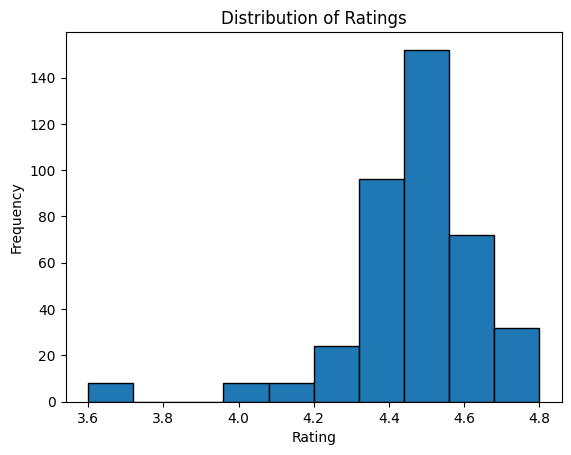

In [13]:
plt.hist(df['Rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Insight: Most books have a rating of 4.5.

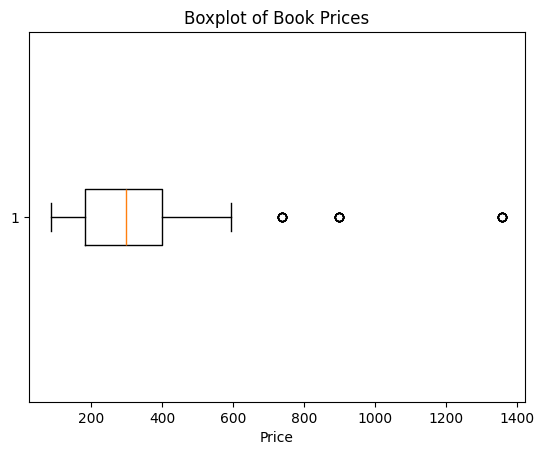

In [14]:
plt.boxplot(df['Price'], vert=False)
plt.title('Boxplot of Book Prices')
plt.xlabel('Price')
plt.show()

In [ ]:
#Insight: 50% of all books are priced between Rs.200 and Rs.400 and the median is Rs.300

In [15]:
# Top 10 authors by number of books in the bestsellers
top_authors = df['Author Name'].value_counts().head(10)
print(top_authors)

Author Name
Wonder House Books                  56
Maple Press                         24
MTG Editorial Board                 16
Joseph Murphy                       16
Dale Carnegie                       16
Gagan Pratap Sir                     8
Chitra Banerjee Divakaruni           8
Oswaal Editorial Board               8
Ichiro Kishimi and Fumitake Koga     8
Chetan Bhagat                        8
Name: count, dtype: int64


In [16]:
# Average rating per author
avg_rating_per_author = df.groupby('Author Name')['Rating'].mean().sort_values(ascending=False)
print(avg_rating_per_author)

Author Name
A.C. Bhaktivendanta Swami Prabhupada     4.800000
Prerna Kain Srishti Agarwal              4.700000
Sachin Jakhar                            4.700000
Gagan Pratap Sir                         4.700000
Francesc Miralles                        4.600000
Murty Sudha                              4.600000
Morgan Housel                            4.600000
M Laxmikanth                             4.600000
Ichiro Kishimi and Fumitake Koga         4.600000
James Clear                              4.600000
Sudha Murty                              4.600000
Chetan Bhagat                            4.600000
Team Pegasus                             4.600000
Dale Carnegie                            4.500000
Oswaal Editorial Board                   4.500000
Joseph Murphy                            4.500000
Joseph Nguyen                            4.500000
Chitra Banerjee Divakaruni               4.500000
Robert T. Kiyosaki                       4.500000
R.D. Sharma                           

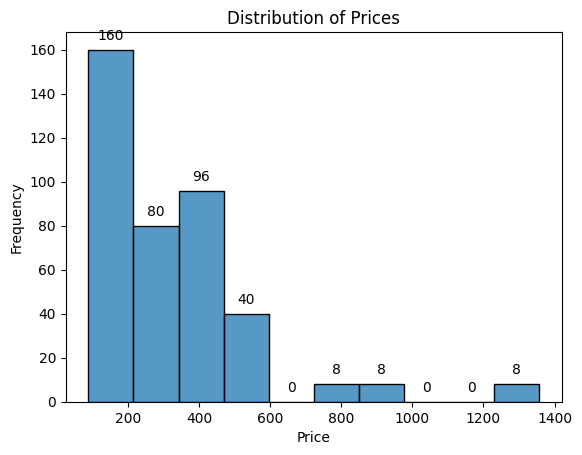

In [35]:
# Plot the histogram
hist = sns.histplot(df['Price'].astype(float), bins=10, kde=False)

# Annotate each bar with its count
for p in hist.patches:
    hist.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 10), 
                  textcoords='offset points')

# Set the title and labels
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

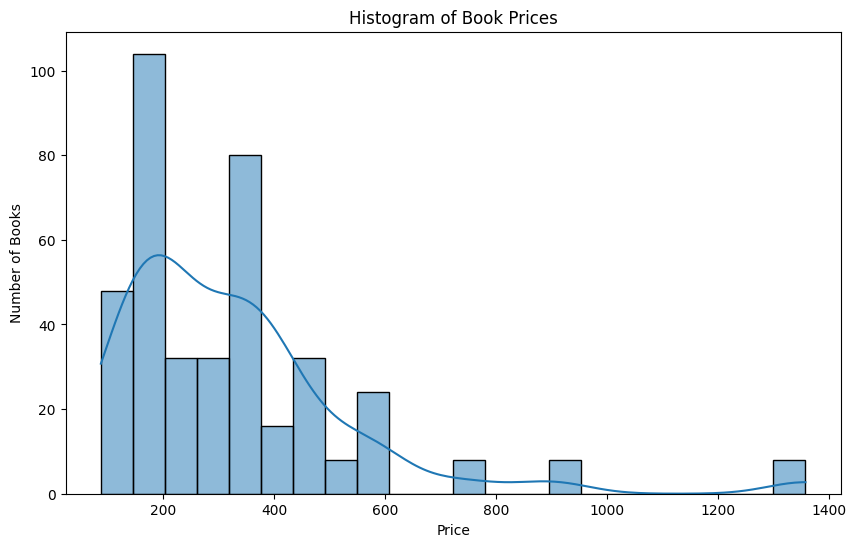

In [17]:
# Histogram of Book Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Histogram of Book Prices')
plt.xlabel('Price')
plt.ylabel('Number of Books')
plt.show()


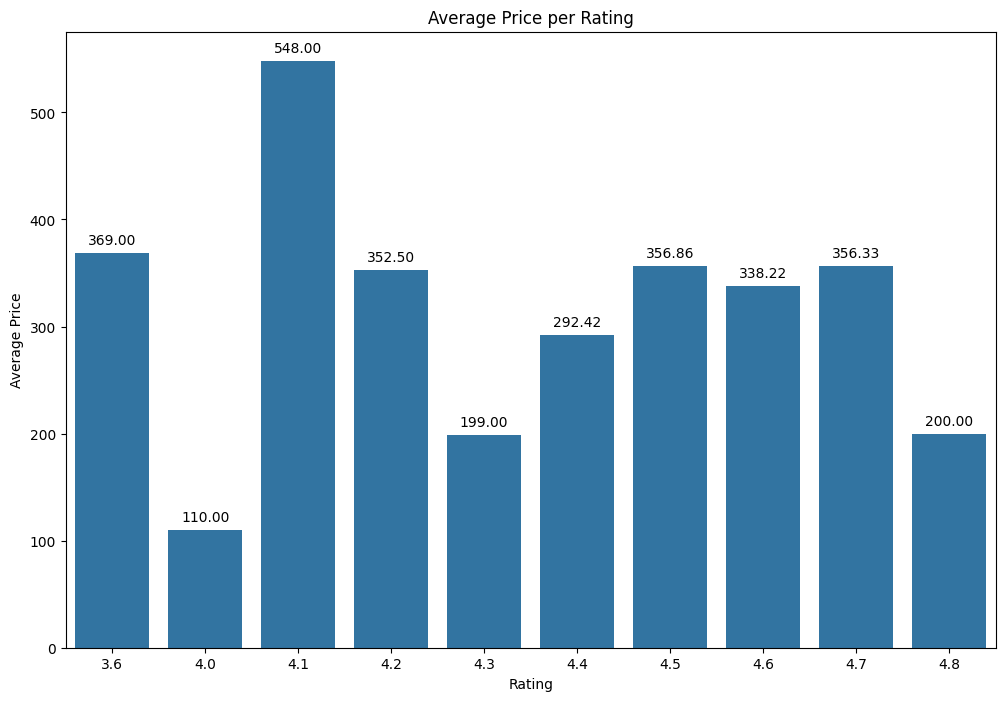

In [20]:
# Average price per rating
avg_price_per_rating = df.groupby('Rating')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=avg_price_per_rating.index, y=avg_price_per_rating.values)

# Annotate each bar with the exact price
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title('Average Price per Rating')
plt.xlabel('Rating')
plt.ylabel('Average Price')
plt.show()


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book Name    400 non-null    object 
 1   Author Name  400 non-null    object 
 2   Rating       400 non-null    float64
 3   Price        400 non-null    float64
dtypes: float64(2), object(2)
memory usage: 12.6+ KB


In [25]:
df.head()

,Book Name,Author Name,Rating,Price
0,Maths Concept King All Formulas and Theorum | ...,Gagan Pratap Sir,4.7,239.0
1,BlackBook of English Vocabulary May 2024 by Ni...,Nikhil Gupta,4.5,299.0
2,Atomic Habits : the life-changing million-copy...,James Clear,4.6,476.0
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,399.0
4,Lucent General Knowledge - New Reduced Price E...,Binay Karna,4.4,209.0


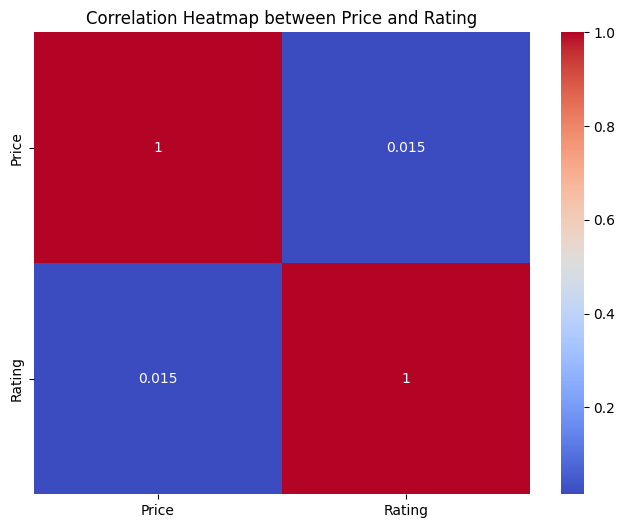

In [32]:

# Calculate the correlation matrix for 'Price' and 'Rating'
correlation_matrix = df[['Price', 'Rating']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap between Price and Rating')
plt.show()

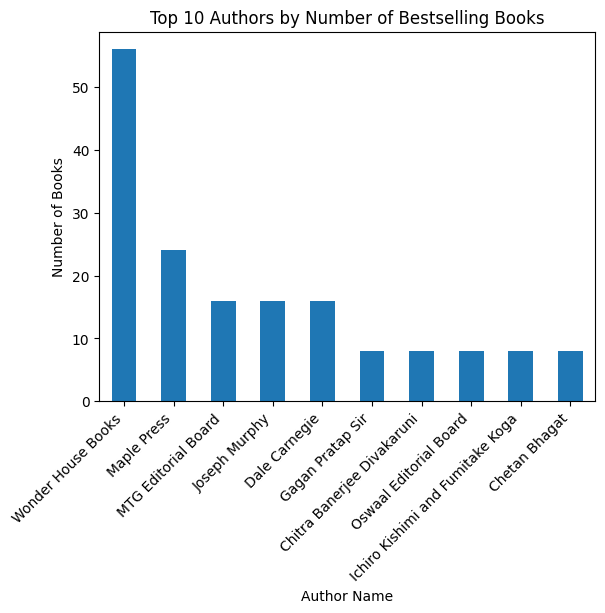

In [36]:
top_authors = df['Author Name'].value_counts().head(10)
top_authors.plot(kind='bar')
plt.title('Top 10 Authors by Number of Bestselling Books')
plt.xlabel('Author Name')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
#Insight: Most selling Publisher is Wonder House Books.

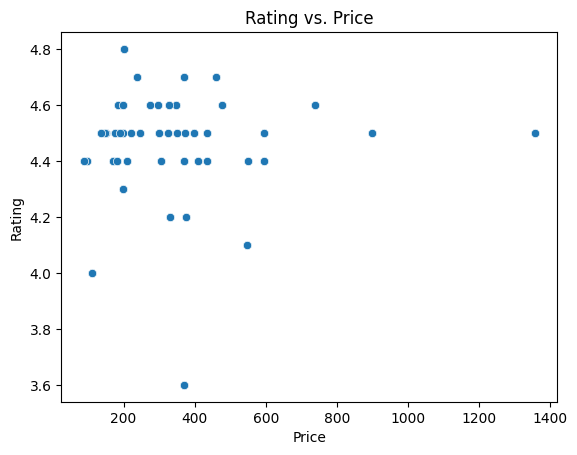

In [37]:
sns.scatterplot(data=df, x='Price', y='Rating')
plt.title('Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


In [ ]:
#Insight: most of the books are rated between 4.4-4.6 and are priced between Rs.400-600 

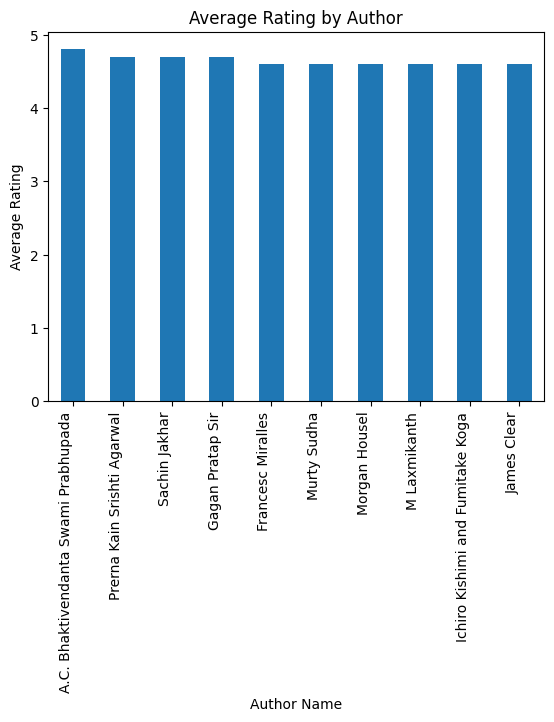

In [42]:
avg_rating_by_author = df.groupby('Author Name')['Rating'].mean().sort_values(ascending=False)
avg_rating_by_author.head(10).plot(kind='bar')


plt.title('Average Rating by Author')
plt.xlabel('Author Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=90, ha='right')
plt.show()


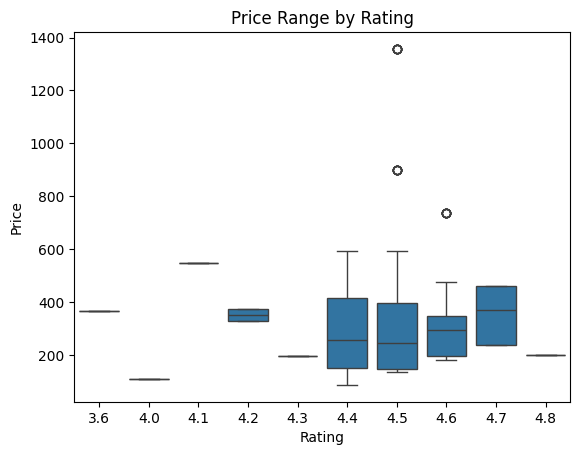

In [43]:
sns.boxplot(data=df, x='Rating', y='Price')
plt.title('Price Range by Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

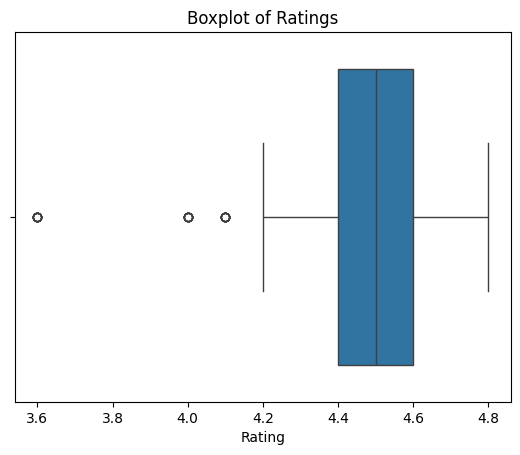

In [46]:
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

In [ ]:
# Insight: 50% of books are rated between 4.4 and 4.6 with median 4.5

In [49]:
# Conclusion: The analysis indicates that books with a 4.5 rating are prevalent among bestsellers, suggesting quality is key to sales.
# A price range of Rs.200 to Rs.400 is most common, with the median at Rs.300, indicating a competitive pricing sweet spot. 
# Wonder House Books stands out as a top publisher, highlighting the importance of brand strength. 
# Books rated between 4.4 and 4.6 and priced between Rs.400-600 show a willingness of customers to pay for perceived quality. Aligning prices with customer expectations and focusing on highly-rated books could drive growth in the online book market.